In [1]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
%matplotlib inline



In [2]:
wine2=pd.read_csv(r"C:\Users\User\Desktop\SOI DATA\winequality-red.csv")
wine2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
bins=[2,6.5,8]
group_names=['bad','good']
wine2['quality']=pd.cut(wine2['quality'], bins=bins,labels=group_names)
wine2['quality']

In [4]:
label2=LabelEncoder()
wine2['quality']=label2.fit_transform(wine2['quality'])

In [5]:
wine2['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [6]:
y=wine2.iloc[:,-1]
X=wine2.drop('quality',axis=1)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

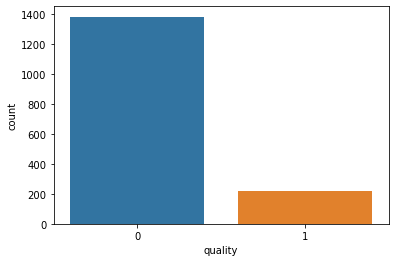

In [7]:
sns.countplot(wine2['quality'])

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [9]:
sc=StandardScaler()


In [10]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [11]:
rfc=RandomForestClassifier(n_estimators=200,max_features=5)
rfc.fit(X_train_scaled, y_train)
rfc.score(X_test_scaled,y_test)


0.8875

In [12]:
y_pred=rfc.predict(X_test)

In [13]:
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       320
           1       0.00      0.00      0.00         0

    accuracy                           0.85       320
   macro avg       0.50      0.43      0.46       320
weighted avg       1.00      0.85      0.92       320

0.853125


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
clf=svm.SVC()


In [15]:
clf.fit(X_train_scaled,y_train)


SVC()

In [16]:
y_pred1=clf.predict(X_test)

In [17]:
print(classification_report(y_pred1,y_test))
print(accuracy_score(y_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       320
           1       0.00      0.00      0.00         0

    accuracy                           0.85       320
   macro avg       0.50      0.43      0.46       320
weighted avg       1.00      0.85      0.92       320

0.853125


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
mlpc.score(X_test,y_test)

0.859375

In [19]:
y_pred3=mlpc.predict(X_test)

In [20]:
print(classification_report(y_pred3,y_test))
print(accuracy_score(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       298
           1       0.26      0.55      0.35        22

    accuracy                           0.86       320
   macro avg       0.61      0.71      0.63       320
weighted avg       0.91      0.86      0.88       320

0.859375


In [21]:
Xnew=[[12,14,12,45,23,21,12,12,13,21,11]]


In [22]:
Xnew=sc.transform(Xnew)
Xnew

array([[ 2.13296354e+00,  7.51621329e+01,  6.00268583e+01,
         2.95733636e+01,  4.64613657e+02,  4.97010797e-01,
        -1.05247862e+00,  5.93096838e+03,  6.29295677e+01,
         1.16537191e+02,  5.52988229e-01]])

In [23]:
ynew=mlpc.predict(Xnew)

In [24]:
ynew

array([0])

In [25]:
grid={
    'C':[1,10,100,1000],
    'kernel':['rbf','linear'],
    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

In [26]:
grid_search_cv=GridSearchCV(SVC(),param_grid=grid,scoring='accuracy')

In [27]:
grid_search_cv.fit(X_train_scaled,y_train)


KeyboardInterrupt: 

In [ ]:
grid_search_cv.best_score_

In [ ]:
grid_search_cv.best_params

In [ ]:
rdm_search_cv=RandomizedSearchCV(SVC(),param_distribution=grid,scoring='accuracy',n_jobs=-1)

In [ ]:
rdm_search_cv.fit(X_train_scaled,y_train)


In [ ]:
rdm_search_cv.best_params_

In [ ]:
2*4